In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Pattern_Recognition/A_Z_Handwritten_data.csv'


In [ ]:
import pandas as pd

# Replace 'My Drive' if it's in a subfolder
file_path = '/content/drive/My Drive/Pattern_Recognition/A_Z_Handwritten_data.csv'
data = pd.read_csv(file_path)

print(data.head())  # Display the first few rows of the dataset


   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
data.shape

(372450, 785)

In [ ]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [ ]:
data.isnull().sum()

,0
0,0
0.1,0
0.2,0
0.3,0
0.4,0
...,...
0.644,0
0.645,0
0.646,0
0.647,0


In [ ]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]])

In [ ]:
#Splitting x and y column from dataset
X = my_data[:,1:]
y = my_data[:,:1]
print(X.shape)
print(y.shape)
print(X)
print(y)

(372450, 784)
(372450, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 0]
 [ 0]
 [ 0]
 ...
 [25]
 [25]
 [25]]


In [ ]:
#Split into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train)
print(X_test)
#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(297960, 28, 28)
(74490, 28, 28)
(297960, 1)
(74490, 1)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0]
 [ 0]
 [ 0]
 ...
 [25]
 [25]
 [25]]
[13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]


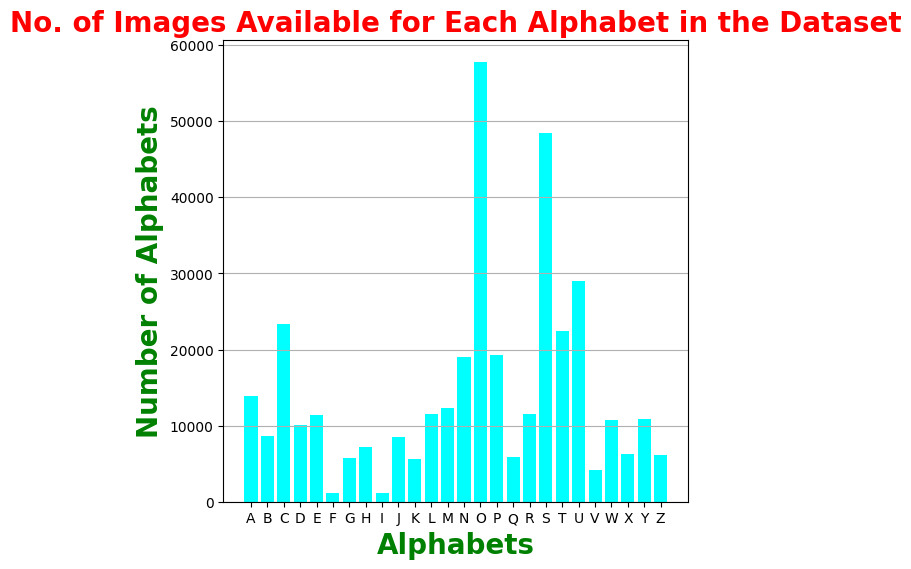

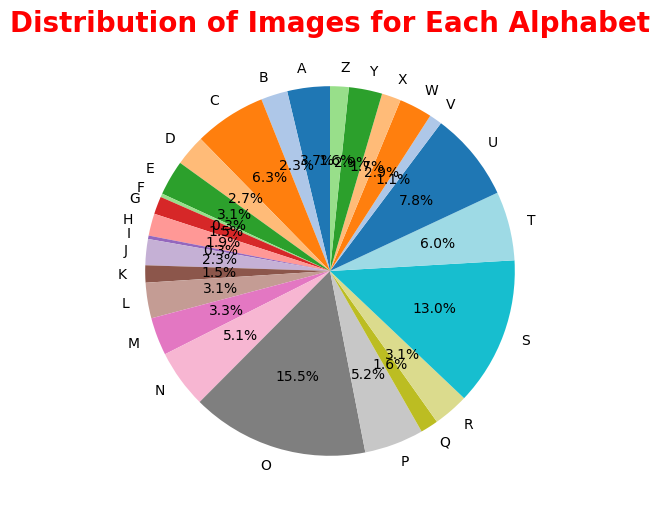

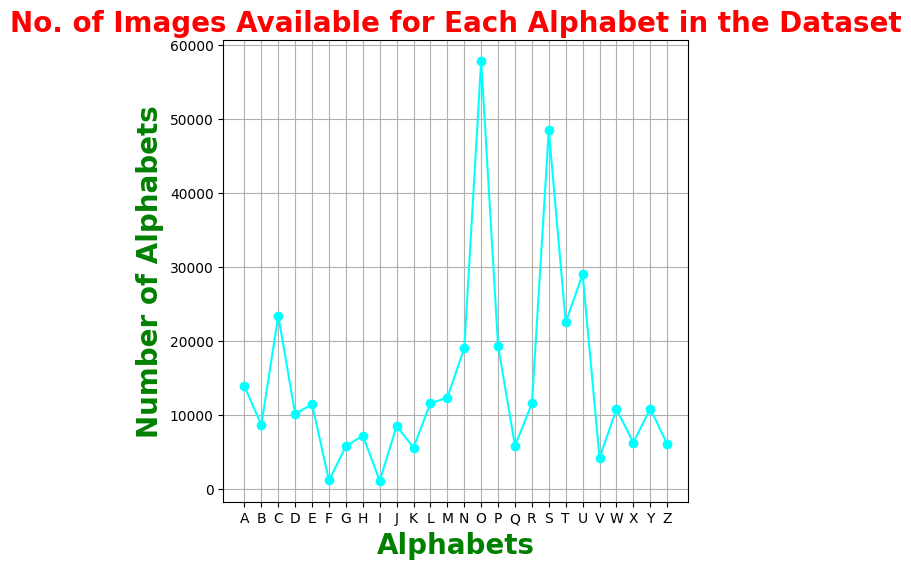

In [ ]:
#Plotting number of images for each alphabet from Dataset
count = np.zeros(26, dtype = 'int') #count list containing all zeroes

print(count)
print(y)
#Label 0 appears multiple times (for 'A'). Label 1 appears multiple times (for 'B'), and so on.
#counting each label
for i in y:
    count[i] += 1
# count = array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
#        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
#      48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])
print(count)
#creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(6, 6))
plt.bar(alphabets, count, color="cyan")
plt.xlabel("Alphabets", fontsize=20, fontweight='bold', color='green')
plt.ylabel("Number of Alphabets", fontsize=20, fontweight='bold', color='green')
plt.title("No. of Images Available for Each Alphabet in the Dataset", fontsize=20, fontweight='bold', color="red")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(count, labels=alphabets, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images for Each Alphabet", fontsize=20, fontweight='bold', color="red")
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(alphabets, count, marker='o', linestyle='-', color='cyan')
plt.xlabel("Alphabets", fontsize=20, fontweight='bold', color='green')
plt.ylabel("Number of Alphabets", fontsize=20, fontweight='bold', color='green')
plt.title("No. of Images Available for Each Alphabet in the Dataset", fontsize=20, fontweight='bold', color="red")
plt.grid()
plt.show()



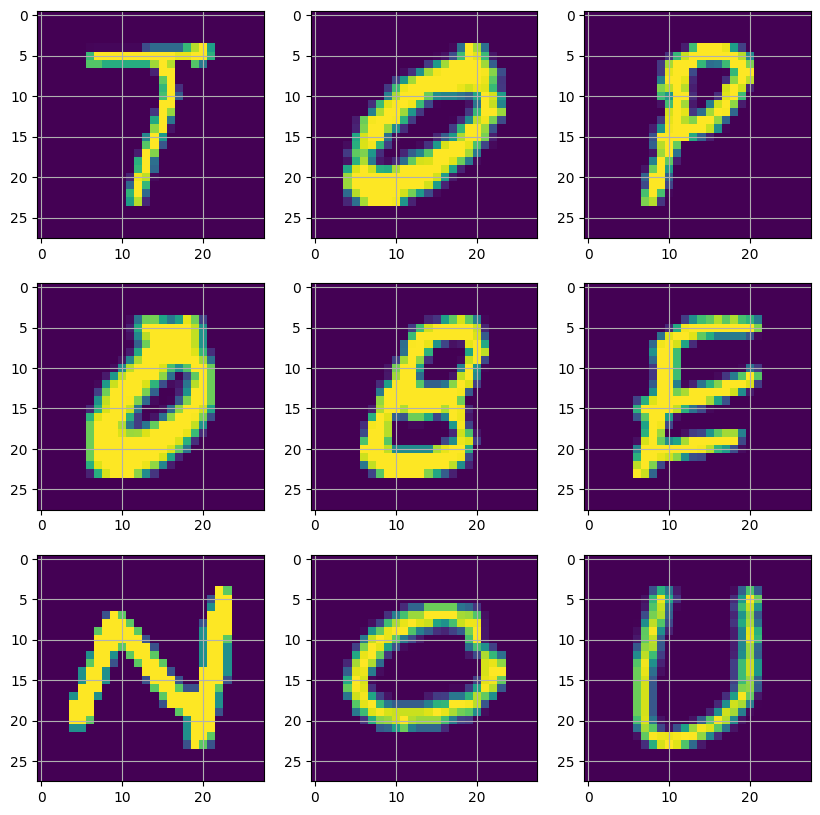

In [ ]:
#Show random images
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(1,3,figsize=(10,10))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

In [ ]:
#Reshaping train & test images from dataset to put in the CNN Model

# Now we reshape the train & test image dataset so that they can be put in the model.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)


New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [ ]:
#Downsampling the images to make them in the range of (0-1)
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
# Convert integer labels to categorical labels
categorical_ytrain = to_categorical(y_train, num_classes=26)
print("New shape of train labels:", categorical_ytrain.shape)
print("Categorical y_train example:\n", categorical_ytrain)

categorical_ytest = to_categorical(y_test, num_classes=26)
print("New shape of test labels:", categorical_ytest.shape)
print("Categorical y_test example:\n", categorical_ytest)

# If you need to convert the labels to integer dtype, use astype(int)
categorical_ytrain = categorical_ytrain.astype(int)
categorical_ytest = categorical_ytest.astype(int)

print("Converted train labels to integer:\n", categorical_ytrain)
print("Converted test labels to integer:\n", categorical_ytest)

print("New shape of train labels:", categorical_ytrain.shape)
print("New shape of test labels:", categorical_ytest.shape)


New shape of train labels: (297960, 26)
Categorical y_train example:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
New shape of test labels: (74490, 26)
Categorical y_test example:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Converted train labels to integer:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Converted test labels to integer:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [ ]:
#CNN Model Architecture
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)

# Model checkpoint with the correct file extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Training the model with the callbacks
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 10, callbacks=[es, mc], validation_data = (X_test, categorical_ytest))


Epoch 1/10
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9010 - loss: 0.3430
Epoch 1: val_accuracy improved from -inf to 0.98303, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 437s 47ms/step - accuracy: 0.9010 - loss: 0.3429 - val_accuracy: 0.9830 - val_loss: 0.0619
Epoch 2/10
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9816 - loss: 0.0646
Epoch 2: val_accuracy improved from 0.98303 to 0.98764, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 437s 46ms/step - accuracy: 0.9816 - loss: 0.0646 - val_accuracy: 0.9876 - val_loss: 0.0460
Epoch 3/10
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9865 - loss: 0.0485
Epoch 3: val_accuracy improved from 0.98764 to 0.98845, saving model to best_model.keras
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 444s 46ms/step - accuracy: 0.9865 - loss: 0.0485 - val_accuracy: 0.9885 - val_loss: 0.0440
Epoch 4/10
9311/9312 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9893 - loss: 0.0380
Epoch 4: val_a

In [ ]:
model.evaluate(X_test,categorical_ytest)


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.9917 - loss: 0.0386


[0.03608669340610504, 0.9922942519187927]

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

In [ ]:
#Find accuracy, losses of Model
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9922942519187927
The training accuracy is : 0.9934051632881165
The validation loss is : 0.03608669340610504
The training loss is : 0.02319183386862278


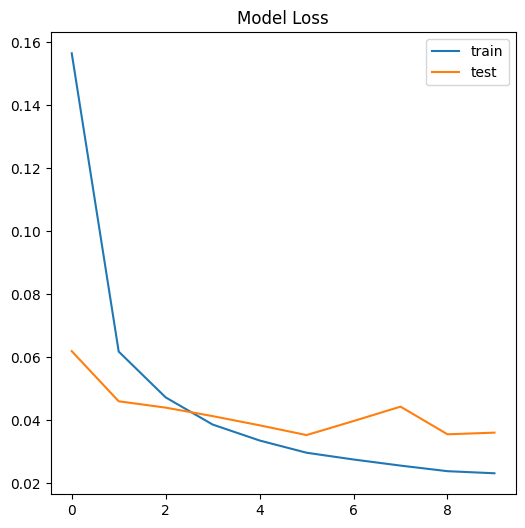

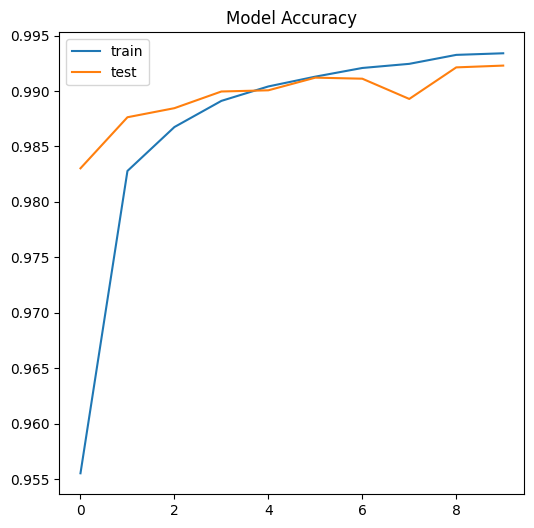

In [ ]:
#Plotting the Model loss and Accuracy on the line graph
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


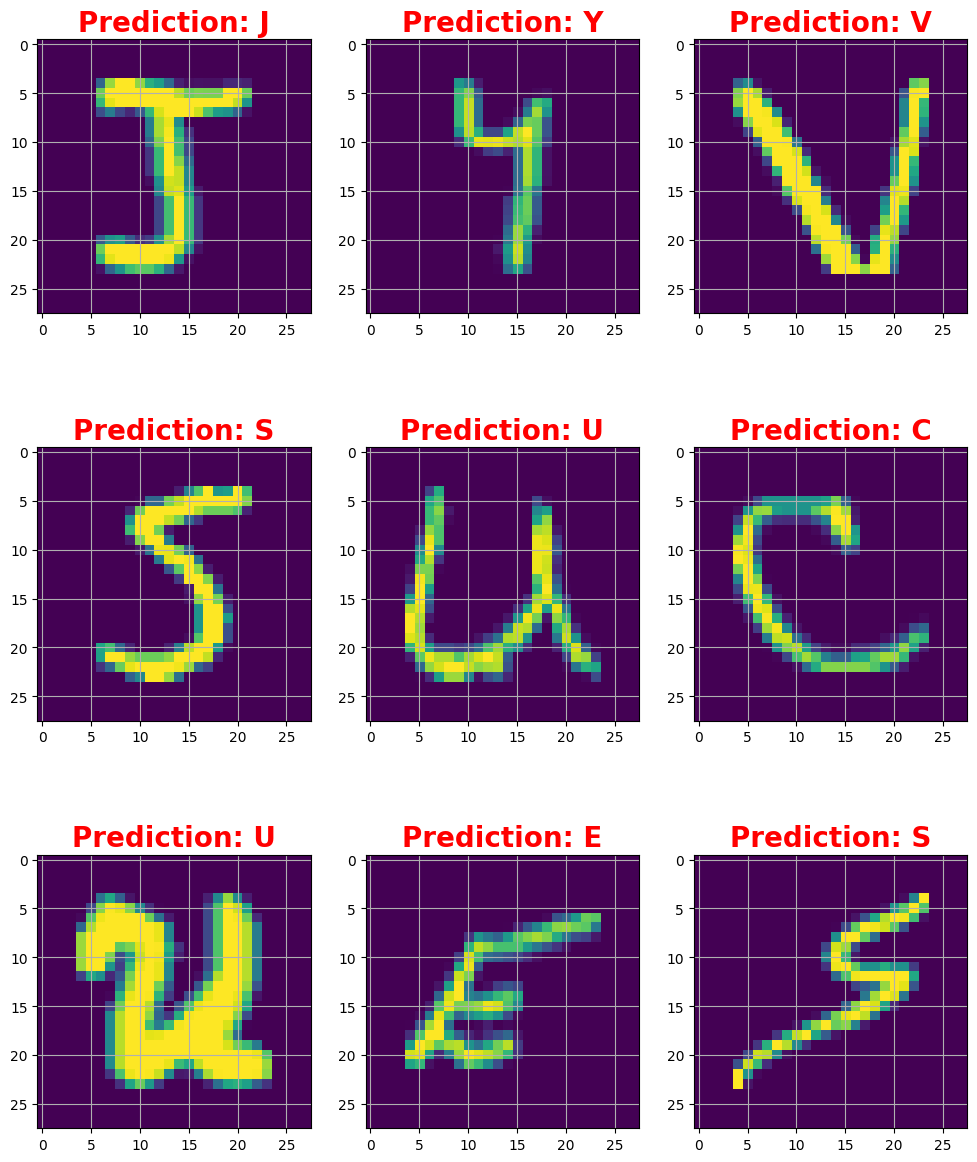

In [ ]:
#Making prediction of test data
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])

    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    axes[i].grid()

In [ ]:
model = load_model('best_model.keras')


In [ ]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


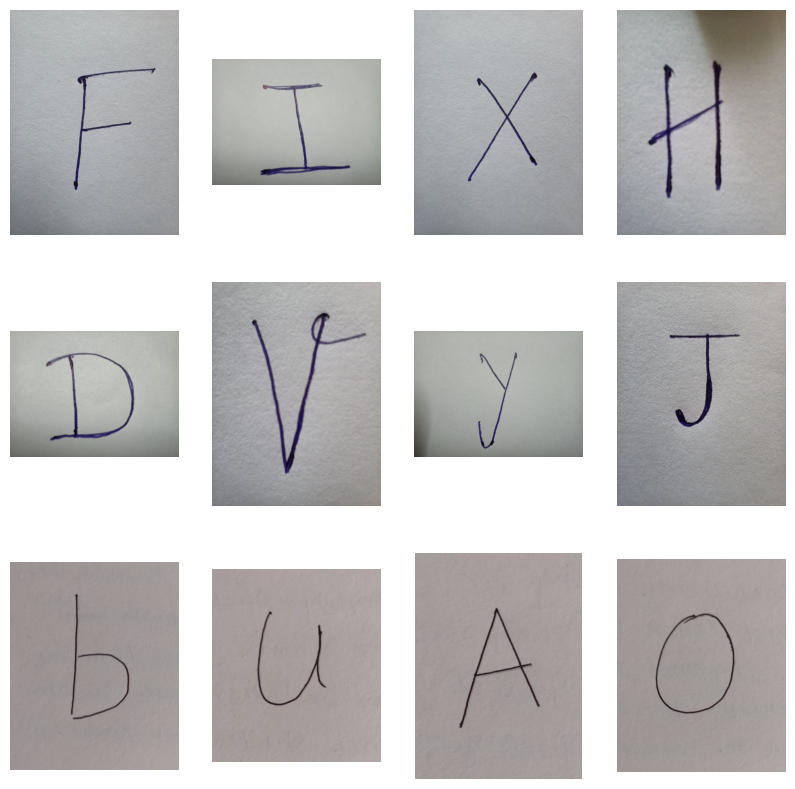

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import os
# Define the path to your images
image_path = "/content/drive/My Drive/Pattern_Recognition/prediction_set/*.jpg"

# Read all images using glob and OpenCV
images = [cv.imread(file) for file in glob.glob(image_path)]

# Set up the plot with a grid
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
axes = axes.flatten()

# Display images
for i in range(len(images)):
    axes[i].imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    axes[i].axis('off')  # Hide axis for better visual display

# Remove unused subplots if fewer images
for j in range(len(images), len(axes)):
    fig.delaxes(axes[j])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


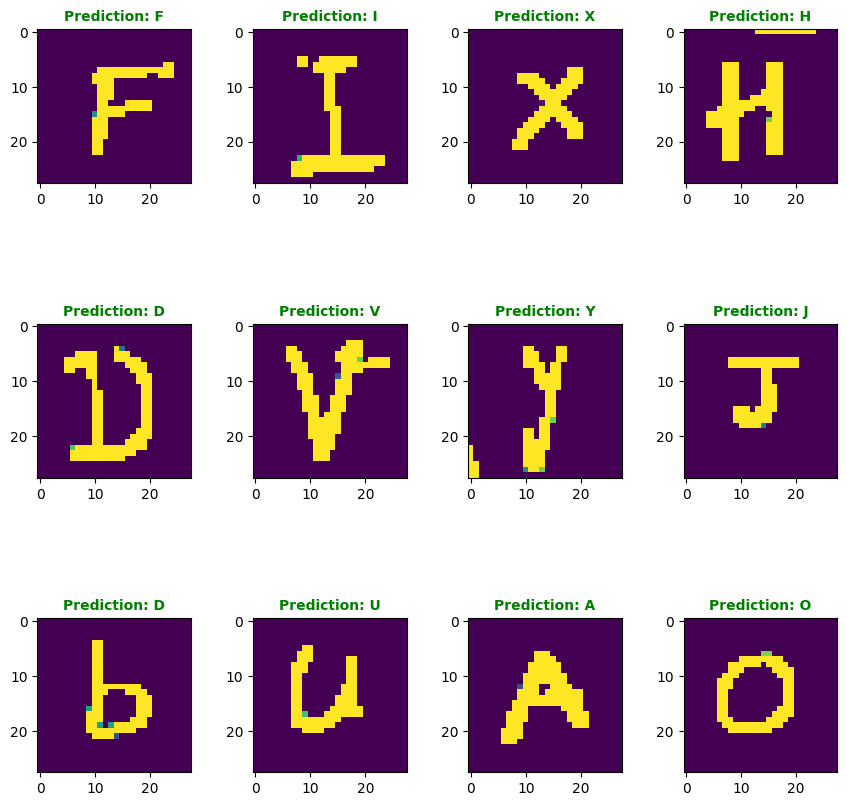

In [ ]:
#Image Processing, Plotting and Predicting the images
fig, axes = plt.subplots(3, 4, figsize = (10, 10))
axes = axes.flatten()

for i in range(len(images)):
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray,5)
    ret,gray = cv.threshold(gray,75,180,cv.THRESH_BINARY)

    element = cv.getStructuringElement(cv.MORPH_RECT,(90,90))
    gray = cv.morphologyEx(gray,cv.MORPH_GRADIENT,element)

    gray = gray/255. #downsampling
    #gray = 1 - gray
    gray = cv.resize(gray, (28,28)) #resizing

    #reshaping the image
    gray = np.reshape(gray, (28, 28))

    axes[i].imshow(gray)

    pred = dict_word[np.argmax(model.predict(np.reshape(gray,(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 10, fontweight = 'bold', color = 'green')
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

